In [3]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3.distributions.timeseries as ts

%config InlineBackend.figure_formats = ['retina']
plt.rc('font', size=12)
plt.style.use('seaborn-darkgrid')

In [4]:
# 1. generate 2 cointegrated assets
N = 1000
X = [50.0]
Y = [40.0]
theta = 0.02
for t in range(1, N):
    X.append(X[t-1] + np.random.normal(0.0, 0.5))
    Y.append(Y[t-1] + np.random.normal(0.0, 0.28) + theta * (0.8 * X[t-1] - Y[t-1]))

X = np.array(X)
Y = np.array(Y)

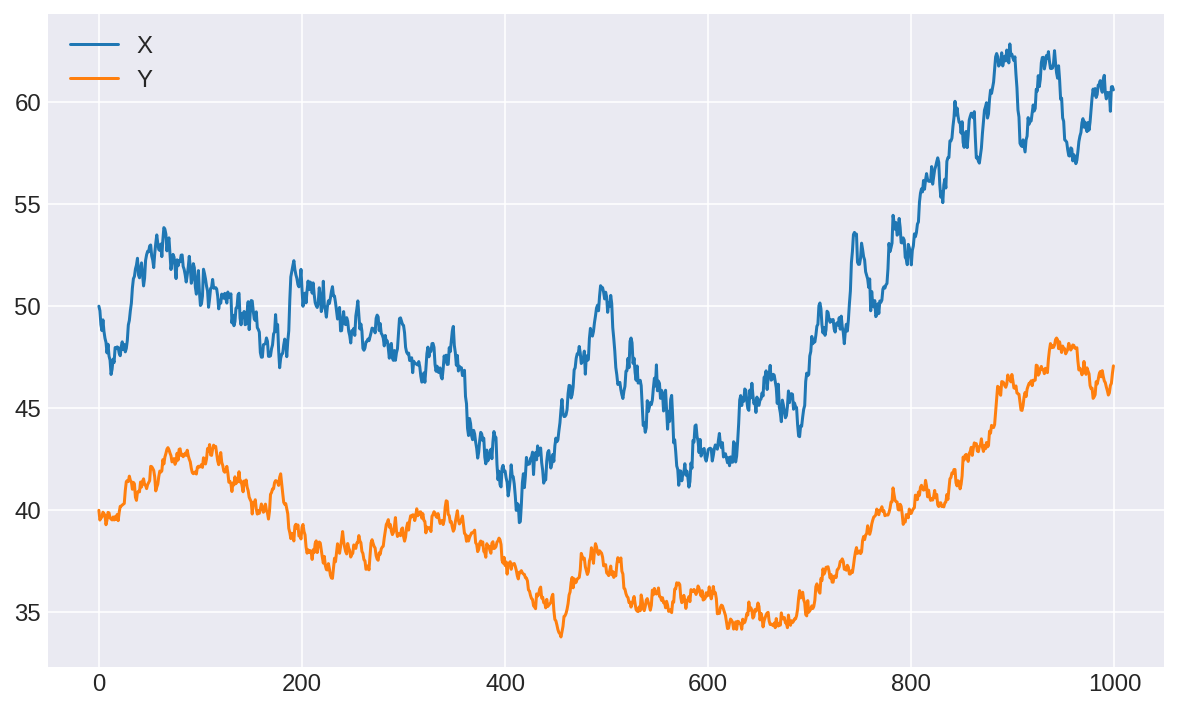

In [13]:
plt.figure(figsize=(10,6))
plt.plot(X, label='X')
plt.plot(Y, label='Y')
plt.legend()
plt.show()

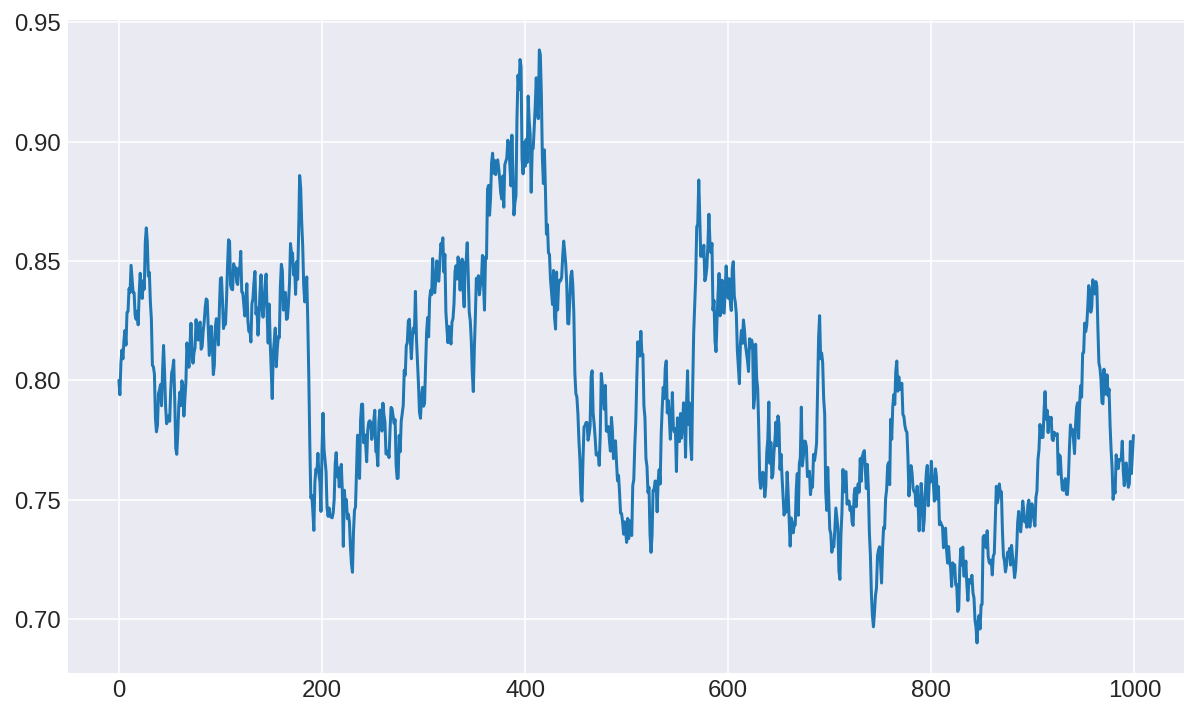

In [6]:
plt.figure(figsize=(10,6))
Z = Y / X
plt.plot(Z)
plt.show()

In [8]:
with pm.Model() as example2:

    theta = pm.HalfNormal('theta', sd=1., testval=1.)
    coeff = pm.HalfNormal('coeff', sd=1., testval=1.)
    sigma = pm.Normal('sigma', sd=1., testval=1.)

    sde = lambda x, theta, distance: (theta * (coeff - x), sigma)
    ts.EulerMaruyama('y', 1.0, sde, [theta, coeff], shape=len(Z), testval=np.ones(len(Z)), observed=Z)

In [14]:
with example2:
    trace = pm.sample(50000, tune=10000, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, coeff, theta]
Sampling 4 chains: 100%|██████████| 240000/240000 [02:13<00:00, 1793.87draws/s]
There were 440 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.3991188434087252, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9328483112036665, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


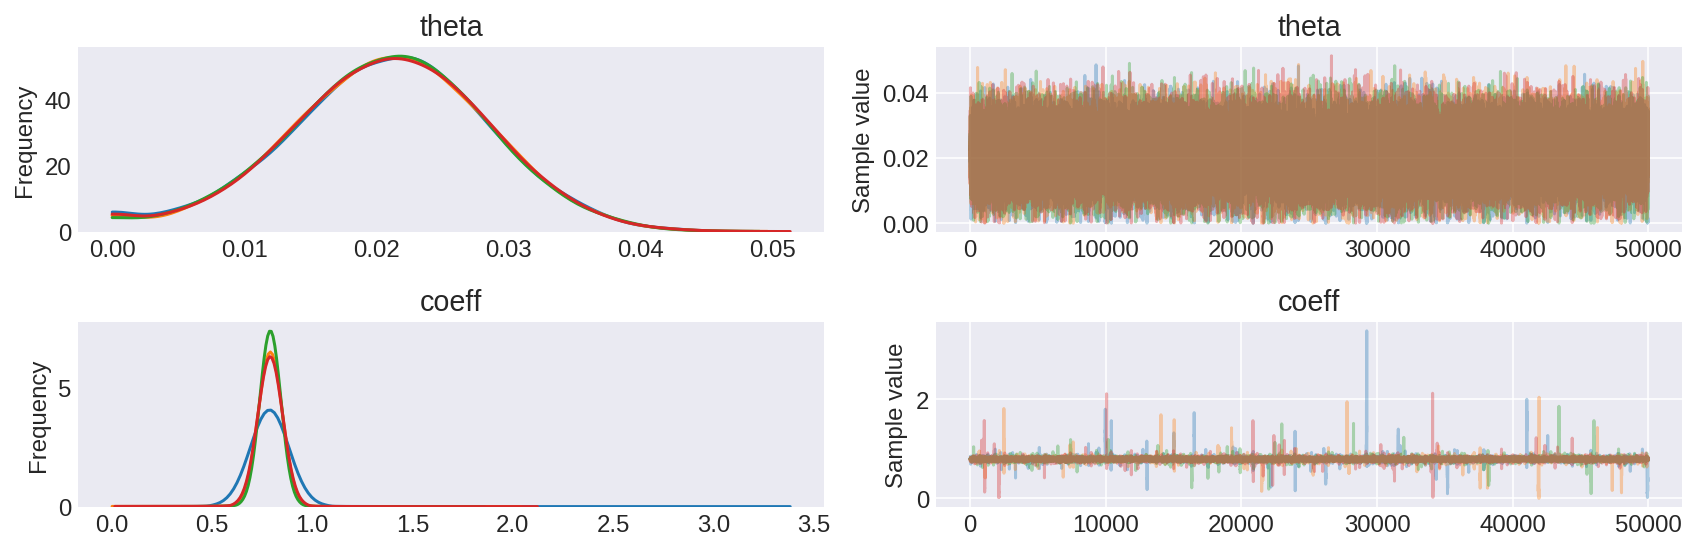

In [15]:
pm.traceplot(trace, varnames=['theta', 'coeff']);

In [16]:
print("theta = ", np.mean(trace['theta']))
print("coeff = ", np.mean(trace['coeff']))

theta =  0.020793213122353108
coeff =  0.791141751980445
